**Question-01**

**I.Import the suitable libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**II.Import the Bank.CSV file into Google colab notebook**

In [2]:
# prompt: Import the Bank.CSV file into Google colab notebook

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Bank.csv')

Saving Bank.csv to Bank.csv


**III.Make an array of dataset**

In [3]:
array = df.values
array

array([[48,  2,  3, ...,  2,  2,  1],
       [40,  1,  1, ...,  1,  1,  2],
       [51,  2,  3, ...,  1,  2,  2],
       ...,
       [64,  1,  3, ...,  2,  2,  1],
       [51,  2,  1, ...,  2,  1,  2],
       [46,  2,  1, ...,  1,  2,  1]])

**IV.Create the Elbow chart**

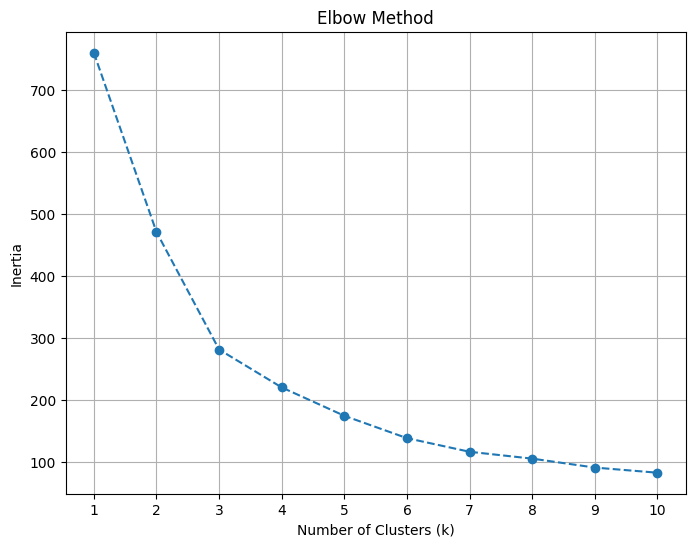

In [4]:
# prompt: Create the Elbow chart

# Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(array)

# Apply PCA for dimensionality reduction (optional but often helpful for visualization)
pca = PCA(n_components=2) # Choose the number of components you want to reduce to
pca_data = pca.fit_transform(scaled_data)

# Calculate inertia (within-cluster sum of squares) for different numbers of clusters
inertia = []
for i in range(1, 11): # Test k from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow chart
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


**V.Find the number of clusters**

In [5]:
optimal_clusters = 3 # Replace with your visual interpretation from the chart

print(f"Based on the Elbow method, the suggested number of clusters is: {optimal_clusters}")

Based on the Elbow method, the suggested number of clusters is: 3


**VI.Define the clusters for each record**

In [6]:
# prompt: VI.Define the clusters for each record

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_data)

# Add the cluster assignments back to the original DataFrame (or a copy)
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

# Display the first few rows with cluster assignments
print(df_clustered.head())

# You can now use df_clustered for further analysis or visualization based on clusters

   Age  Sex  Region  Married  Car  Savingaccount  Mortageg  PEP  Cluster
0   48    2       3        2    1              2         2    1        2
1   40    1       1        1    1              1         1    2        1
2   51    2       3        1    2              1         2    2        0
3   23    2       1        1    1              2         2    2        0
4   57    2       2        1    2              2         2    2        0


**VII.Concatenate the dataset and the cluster index**

In [8]:
print("DataFrame after concatenating dataset and cluster index:")
print(df_clustered.head())


DataFrame after concatenating dataset and cluster index:
   Age  Sex  Region  Married  Car  Savingaccount  Mortageg  PEP  Cluster
0   48    2       3        2    1              2         2    1        2
1   40    1       1        1    1              1         1    2        1
2   51    2       3        1    2              1         2    2        0
3   23    2       1        1    1              2         2    2        0
4   57    2       2        1    2              2         2    2        0


**VIII.Visualize the clusters**

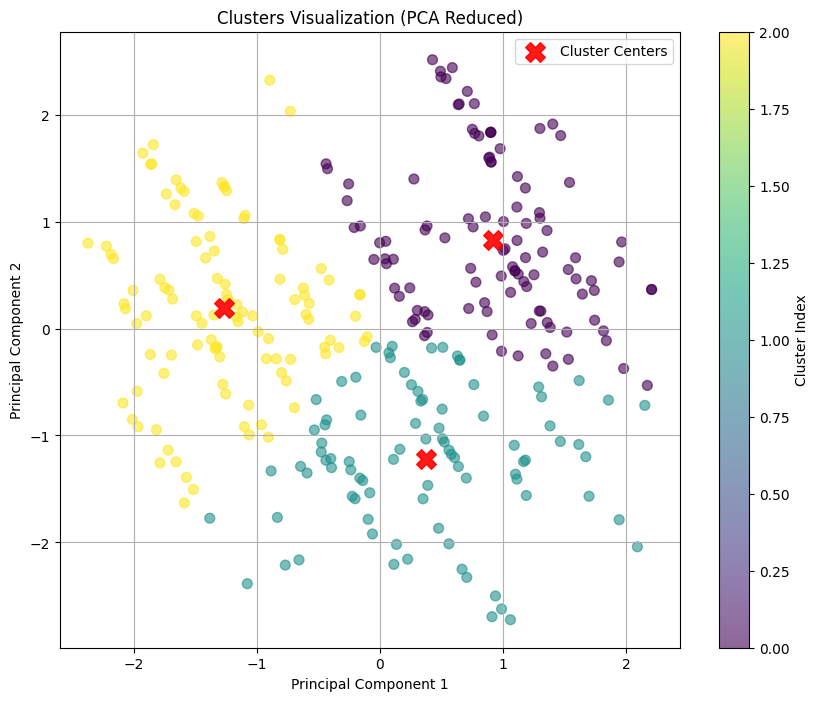

In [9]:
# prompt: Visualize the clusters

# Visualize the clusters using the PCA-reduced data
plt.figure(figsize=(10, 8))

# Scatter plot of the data points colored by their cluster assignment
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6)

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, label='Cluster Centers', marker='X')

plt.title('Clusters Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Index')
plt.legend()
plt.grid(True)
plt.show()

**IX.Find the cluster centroid for each cluster**

In [10]:
cluster_centroids = kmeans.cluster_centers_

print("\nCluster Centroids (in the PCA-reduced space):")
cluster_centroids



Cluster Centroids (in the PCA-reduced space):


array([[ 0.91666379,  0.82628649],
       [ 0.37718322, -1.22145214],
       [-1.26588782,  0.19515948]])

**X.Visualize the cluster centroids in the scatter plot**

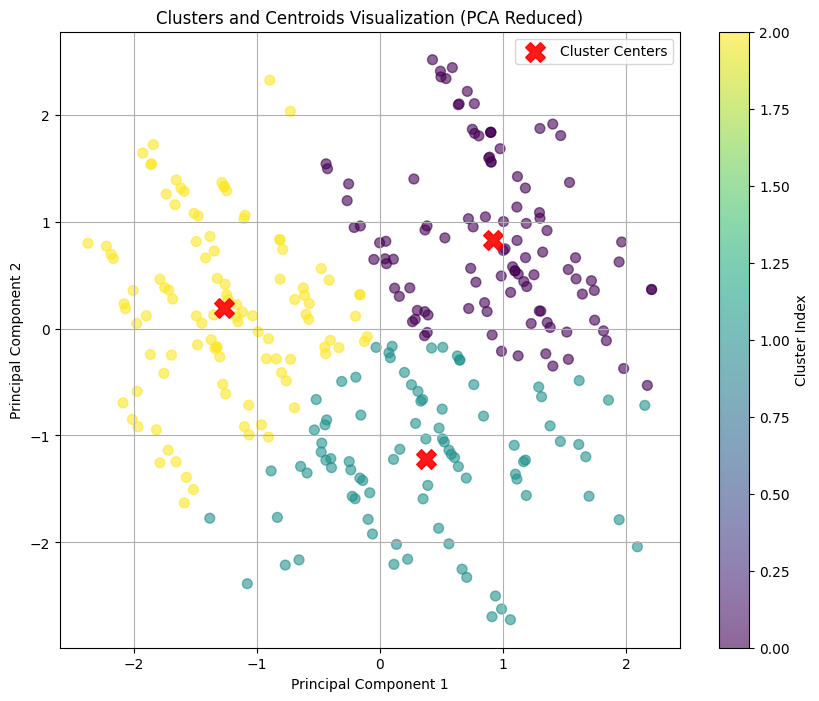

In [11]:
# To explicitly show the centroids again if needed:
plt.figure(figsize=(10, 8))

# Scatter plot of the data points colored by their cluster assignment
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6)

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, label='Cluster Centers', marker='X')

plt.title('Clusters and Centroids Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Index')
plt.legend()
plt.grid(True)
plt.show()

**Question 02**

**I.Import suitable libraries**

In [12]:
# prompt: Import suitable libraries

import pandas as pd
import numpy as np
from google.colab import files

**II.Upload the data set Bank.CSV**

In [13]:
# prompt: Upload the data set Bank.CSV

uploaded = files.upload()
df = pd.read_csv('Bank.csv')
df.head()

Saving Bank.csv to Bank (1).csv


,Age,Sex,Region,Married,Car,Savingaccount,Mortageg,PEP
0,48,2,3,2,1,2,2,1
1,40,1,1,1,1,1,1,2
2,51,2,3,1,2,1,2,2
3,23,2,1,1,1,2,2,2
4,57,2,2,1,2,2,2,2


**III.Separate the data frame into two parts**

In [14]:
part1_df = df.iloc[:len(df)//2]
part2_df = df.iloc[len(df)//2:]

print("First Part of DataFrame:")
print(part1_df.head())

print("\nSecond Part of DataFrame:")
print(part2_df.head())

First Part of DataFrame:
   Age  Sex  Region  Married  Car  Savingaccount  Mortageg  PEP
0   48    2       3        2    1              2         2    1
1   40    1       1        1    1              1         1    2
2   51    2       3        1    2              1         2    2
3   23    2       1        1    1              2         2    2
4   57    2       2        1    2              2         2    2

Second Part of DataFrame:
     Age  Sex  Region  Married  Car  Savingaccount  Mortageg  PEP
150   53    1       2        1    1              1         2    1
151   43    1       1        2    1              1         2    1
152   63    1       1        1    1              2         1    1
153   33    1       3        1    1              2         1    1
154   41    1       2        2    1              1         2    2


**IV.Delete the class variable in independent dataset**

In [15]:
# If it's the last column:
independent_df = df.iloc[:, :-1]

# Display the first few rows of the independent dataset to verify
print("\nIndependent Dataset (Class Variable Deleted):")
print(independent_df.head())


Independent Dataset (Class Variable Deleted):
   Age  Sex  Region  Married  Car  Savingaccount  Mortageg
0   48    2       3        2    1              2         2
1   40    1       1        1    1              1         1
2   51    2       3        1    2              1         2
3   23    2       1        1    1              2         2
4   57    2       2        1    2              2         2


**V.Split the dataset into test and training set**

In [16]:
# prompt: Split the dataset into test and training set

from sklearn.model_selection import train_test_split

# Assuming 'df' is your original DataFrame with features and the target variable
# Assuming the target variable is the last column for demonstration
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target variable (the last column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

print("\nTraining Features (X_train):")
print(X_train.head())

print("\nTesting Features (X_test):")
print(X_test.head())

print("\nTraining Target (y_train):")
print(y_train.head())

print("\nTesting Target (y_test):")
print(y_test.head())

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Training Features (X_train):
     Age  Sex  Region  Married  Car  Savingaccount  Mortageg
232   46    1       1        2    2              1         1
59    34    1       3        2    1              1         1
6     22    1       2        2    2              2         2
185   49    1       2        1    1              1         1
173   34    1       2        1    1              1         2

Testing Features (X_test):
     Age  Sex  Region  Married  Car  Savingaccount  Mortageg
203   35    1       3        2    2              2         1
266   38    1       3        1    2              2         2
152   63    1       1        1    1              2         1
9     54    1       1        1    1              1         2
233   42    2       2        1    2              2         1

Training Target (y_train):
232    2
59     1
6      1
185    1
173    1
Name: PEP, dtype: int64

Testing Target (y_test):
203    1
266    2
152    1
9      2
233    1
Name: PEP, dtype: int64

Shape of X_train:

**VI.Find the prediction of the Using Decision tree**

In [17]:
# prompt: Find the prediction of the Using Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree Classifier object
# You can tune hyperparameters like criterion ('gini' or 'entropy'), max_depth, min_samples_split, etc.
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model (optional, but good practice to see performance)
print("\nDecision Tree Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Decision Tree Classifier Evaluation:
Accuracy: 0.5333333333333333

Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.44      0.50        32
           2       0.50      0.64      0.56        28

    accuracy                           0.53        60
   macro avg       0.54      0.54      0.53        60
weighted avg       0.54      0.53      0.53        60



**V.Construct the confusion matrix**


Confusion Matrix:
[[14 18]
 [10 18]]


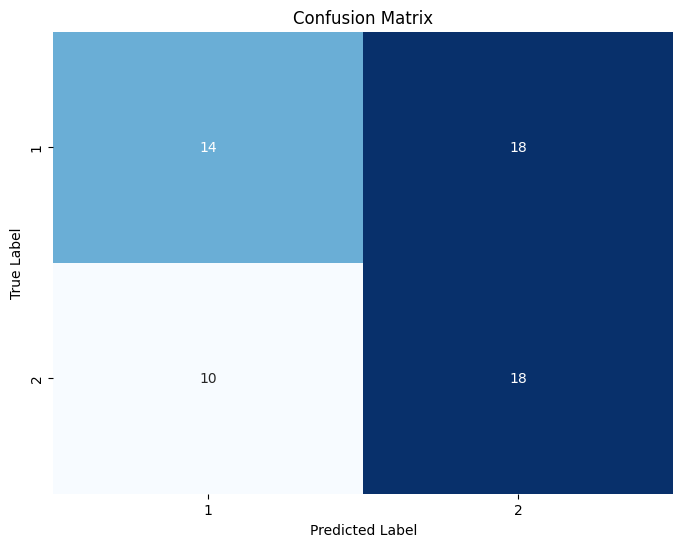

In [18]:
# prompt: Construct the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Construct the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=dt_classifier.classes_,
            yticklabels=dt_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()